In [51]:
# check the file Dataset.zip exsits in colab
!ls -l .


total 92104
-rw-r--r-- 1 root root 94304102 Nov 23 06:42 Dataset.zip
drwxr-xr-x 1 root root     4096 Nov 21 14:24 sample_data


In [52]:
# unzip the Dataset.zip into dataset folder
!unzip Dataset.zip -d dataset

Archive:  Dataset.zip
   creating: dataset/Dataset/
  inflating: dataset/Dataset/Test.json  
  inflating: dataset/Dataset/Train.json  
  inflating: dataset/Dataset/Validation.json  
  inflating: dataset/Dataset/readme_pquad_en.txt  
  inflating: dataset/Dataset/readme_pquad_fa.txt  
   creating: dataset/Dataset/xray_dataset_covid19/
   creating: dataset/Dataset/xray_dataset_covid19/test/
   creating: dataset/Dataset/xray_dataset_covid19/test/COVID/
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig2.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day0.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day4.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day7.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/S

In [ ]:
# extract the data relevent to our works:
!mv ./dataset/Dataset/xray_dataset_covid19/ ./dataset/

In [54]:
# chack the dataset folder:
!ls -l ./dataset/

total 8
drwxr-xr-x 2 root root 4096 Nov 23 07:10 Dataset
drwxr-xr-x 4 root root 4096 Nov 11 11:10 xray_dataset_covid19


In [55]:
# remove the unnecessary files:)
!rm -r ./dataset/Dataset/

In [56]:
# chack the dataset folder:
!ls -l ./dataset/

total 4
drwxr-xr-x 4 root root 4096 Nov 11 11:10 xray_dataset_covid19


**4.2.3. Data Augmentation:**

Data augmentation is a technique that can significantly increase the data instances of a dataset to train a model [23]. In the case of image datasets, the technique uses the basic image processing operations,
such as **flipping**, **rotating**, **cropping**, or **padding** for augmentation.

- Two image processing operations, **flipping** and **rotation**, have
been used in this study for data augmentation.  

  - 1- In the first phase of data augmentation, the 90 X-ray images have been **flipped** to get extra 90 images.

  - 2- In the second phase, the original 90 images have further been **rotated by 90°angle** to get 90 more images.

  - 3- **rotated by 180°angle** to get 90 more images.

  - 4- finally, the original 90 images were further **rotated by 270°angle** to get more 90 images.

These operations resulted in a dataset containing **450** COVID-19 X-ray images.

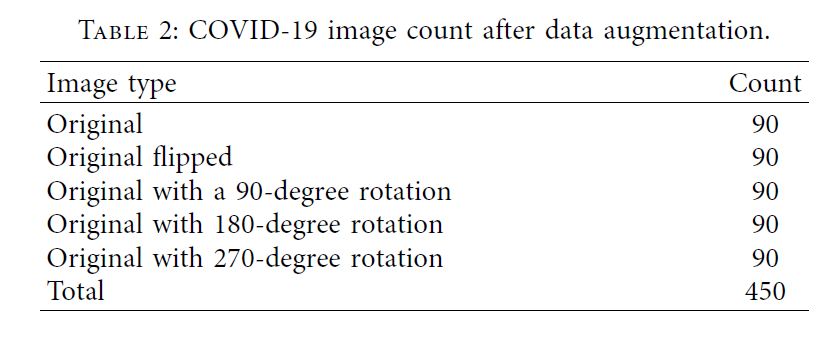

In [57]:
import cv2
import os
import random

def augment_data(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
          if filename.lower().endswith((".jpg", ".png", ".jpeg")):

            # Read the original image
            original_image = cv2.imread(os.path.join(input_folder, filename))
            # Save the original image
            save_path = os.path.join(output_folder, f"original_{filename}")
            cv2.imwrite(save_path, original_image)

            # Randomly choose to flip horizontally or vertically
            flip_direction = random.choice(["horizontal", "vertical"])

            # Flip the original image
            if flip_direction == "horizontal":
                flipped_image = cv2.flip(original_image, 1)  # 1 means horizontal flip
                save_path = os.path.join(output_folder, f"flipped_horizontal_{filename}")
            else:
                flipped_image = cv2.flip(original_image, 0)  # 0 means vertical flip
                save_path = os.path.join(output_folder, f"flipped_vertical_{filename}")
            # Save the Flipped image
            cv2.imwrite(save_path, flipped_image)

            # Rotate the original image
            for angle in [90, 180, 270]:
              if angle == 90:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
              elif angle == 180:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
              elif angle == 270:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
              # Save the rotated image
              save_path = os.path.join(output_folder, f"rotated_{angle}_{filename}")
              cv2.imwrite(save_path, rotated_image)



In [58]:
# Do the augmentation on train/COVID images and store them in augmented/COVID
augment_data(input_folder="dataset/xray_dataset_covid19/train/COVID/", output_folder="dataset/xray_dataset_covid19/augmented/COVID")
# Do the augmentation on train/NORMAL images and store them in augmented/NORMAL
augment_data(input_folder="dataset/xray_dataset_covid19/train/NORMAL/", output_folder="dataset/xray_dataset_covid19/augmented/NORMAL")

In [59]:
# check the result of augmentation
! ls -l ./dataset/xray_dataset_covid19/augmented/

total 64
drwxr-xr-x 2 root root 36864 Nov 23 07:11 COVID
drwxr-xr-x 2 root root 24576 Nov 23 07:11 NORMAL


In [60]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt


# Load the augmented data
augmented_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/augmented/',
    image_size=(150, 150),
    )


# Load the test data
test_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/test/',
    image_size=(150, 150),
    )


Found 740 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [61]:
# Show the class names of augmented data
class_names = augmented_data.class_names
class_names

['COVID', 'NORMAL']

In [62]:
# Show the class names of test data
class_names = test_data.class_names
class_names

['COVID', 'NORMAL']


class 0 => covid

class 1 => normal







In [63]:
# Rescale the augmented data
augmented_data = augmented_data.map(lambda x, y: (x/255, y))

# Rescale the test data
test_data = test_data.map(lambda x, y: (x/255, y))

In [64]:
# Create validation data
validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/augmented/',
    image_size=(150, 150),
    validation_split=0.25,
    subset="validation",
    seed=1337
)

# Normalize the pixel values to be between 0 and 1
validation_data = validation_data.map(lambda x, y: (x / 255, y))


Found 740 files belonging to 2 classes.
Using 185 files for validation.


In [65]:
# Convert them to iterators
# For augmented data:
augmented_data_iterator = augmented_data.as_numpy_iterator()

# For test data:
test_data_iterator = test_data.as_numpy_iterator()

In [66]:
# Get a bath of augmented images:
augmented_data_batch = augmented_data_iterator.next()
len(augmented_data_batch)

2

In [67]:
# Images represented as numbpy arrays
augmented_data_batch[0].shape

(32, 150, 150, 3)

In [68]:
# The labels:
augmented_data_batch[1]

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

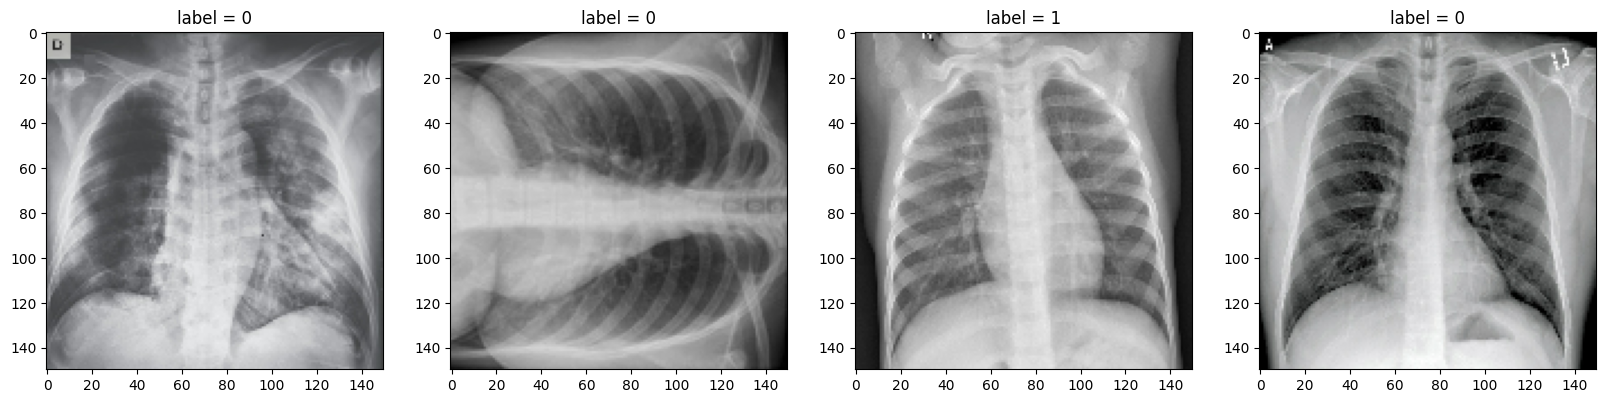

In [69]:
# Show 4 images of batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(augmented_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {augmented_data_batch[1][index]}")

In [70]:
# Get another batch from the iterator:
another_augmented_data_batch = augmented_data_iterator.next()
len(another_augmented_data_batch)

2

In [71]:
# The labels
another_augmented_data_batch[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int32)

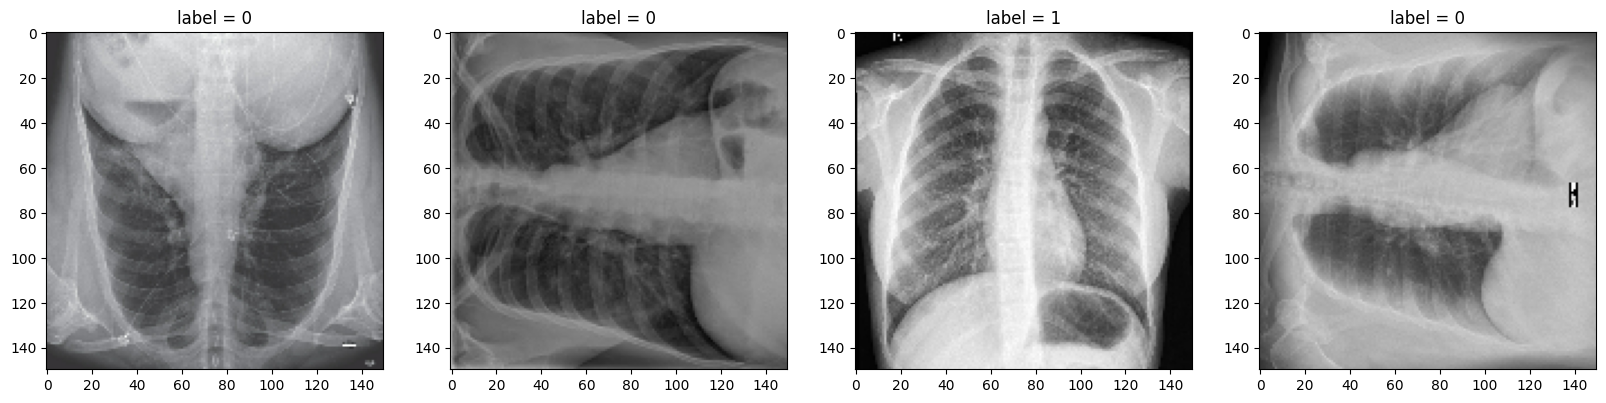

In [72]:
# Show 4 images of batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(another_augmented_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {another_augmented_data_batch[1][index]}")

In [73]:
# Get the a batch of test data:
test_data_batch = test_data_iterator.next()
len(test_data_batch)

2

In [74]:
# The labels
test_data_batch[1]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

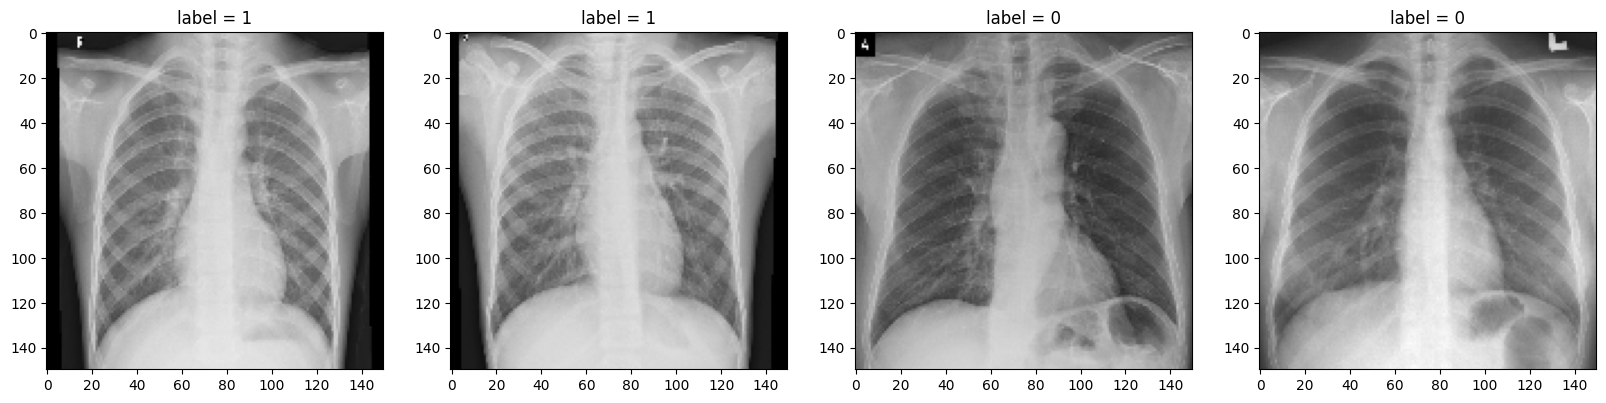

In [75]:
# Show 4 images of test data batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(test_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {test_data_batch[1][index]}")

**4.3.1. The Proposed CNN Architecture.**

 The proposed CNN model consists of 38 layers in which 6 are convolutional (Conv2D), 6 max pooling layers, 6 dropout layers, 8 activation function layers, 8 batch normalization layers, 1 flatten layer, and 3 fully connected layers; CNN model input image shape is (150, 150, 3), i.e., 150-by-150 RGB image. In all Con2D layers, a 3 × 3 size kernel has been used but the filter size after every two Con2D layers increases. At the 1st and 2nd layers of Con2D, 64 filters have been used to learn from input and the 3rd and 4th layers of Con2D use 128 filters, and at the 5th and 6th layers, 256 filters have been used. After each Con2D layer, the max pooling layer with 2 × 2 pooling size has been used, the batch normalization layer has been used with the axis = −1 argument, the activation layer has been used with the ReLU function, and the dropout layer has been used with 20% dropout rate. The output of 256 output neurons of the final Con2D layer is followed by max pooling, batch normalization, activation, and dropout layer. Since the final pooling and convolutional layer gives a three-dimensional matrix as output, to flatten the matrix, a flattening layer has been used which converts them into a vector that will be input for 3 dense layers. This study uses CNN for binary classification; that is the reason for using the binary crossentropy (BCE) loss function. In binary classification since only one output node is needed to classify the data to one of the two given classes, so in the case of BCE loss function, the output value is being given to a sigmoid activation function. The output given by the sigmoid activation function lies between 0 and 1. It finds the error between the predicted class and the actual class. The “Adam” optimizer has been used which changes the attribute weight and learning rate to reduce the loss of the learning model. The model parameter values are given in Table 3, and the model architecture is given in Figure 4.
During the initial experiments, the CNN has been used withdifferent configurations in terms of the usage of number of convolution layers in the model. The decision of how many convolution layers used in the model was made by using an incremental approach. First, the CNN was tested using only one convolutional layer and the results were analysed. Then, the CNN was built with two layers and results were analysed and so on. The approach had been continued till the results provided by the model were accurate and effective. The final model which was very feasible according to its results consisted of six convolution layers. The results of each increment of the model have been reported in the Results section.

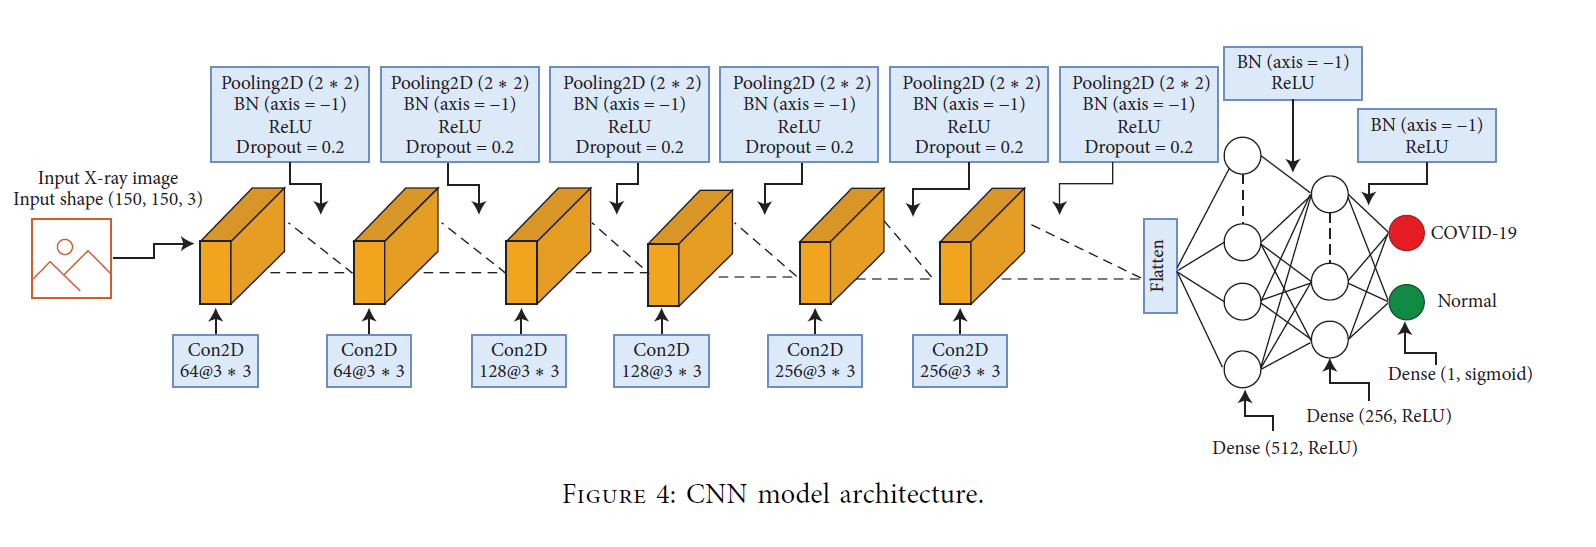

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model = Sequential()

# Convolutional Layers
# First layer
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second layer:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third layer:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Forth layer:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth layer:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Sixth layer:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_40 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_30 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 37, 37, 64)       

Epoch 1/50
24/24 [==============================] - 18s 293ms/step - loss: 0.7754 - accuracy: 0.7757 - val_loss: 132.6638 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 14s 424ms/step - loss: 0.1318 - accuracy: 0.9554 - val_loss: 6.0858 - val_accuracy: 0.4865
Epoch 3/50
24/24 [==============================] - 14s 432ms/step - loss: 0.0894 - accuracy: 0.9608 - val_loss: 11.9781 - val_accuracy: 0.4703
Epoch 4/50
24/24 [==============================] - 14s 434ms/step - loss: 0.1298 - accuracy: 0.9514 - val_loss: 10.1559 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 14s 420ms/step - loss: 0.0857 - accuracy: 0.9649 - val_loss: 13.1829 - val_accuracy: 0.4703
Epoch 6/50
24/24 [==============================] - 14s 437ms/step - loss: 0.0747 - accuracy: 0.9716 - val_loss: 12.1573 - val_accuracy: 0.4703
Epoch 7/50
24/24 [==============================] - 14s 397ms/step - loss: 0.1772 - accuracy: 0.9351 - val_loss: 0.5629 - val_accuracy: 

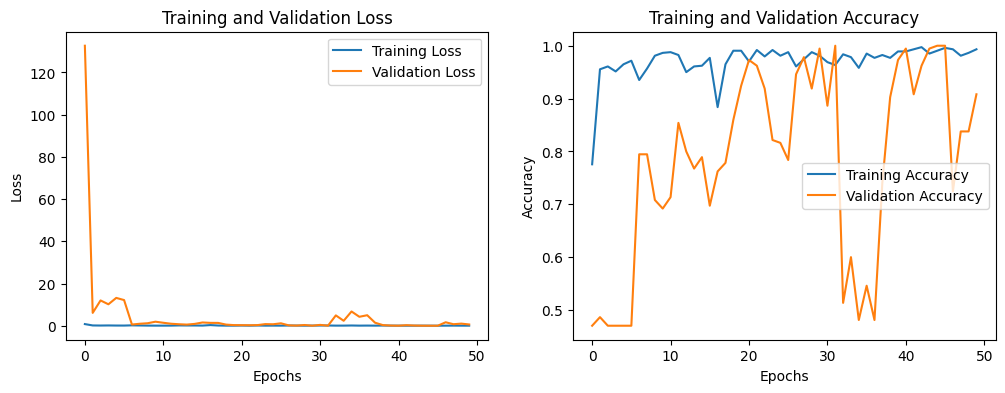

In [81]:

# Train the model using the augmented_data for training and validation_data for validation
history = model.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save("./models/model.h5")


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2/2 [==============================] - 1s 13ms/step
Accuracy: 0.6750
Precision: 0.6667
Recall (Sensitivity): 0.7000
F1 Score: 0.6829
Specificity: 0.6500


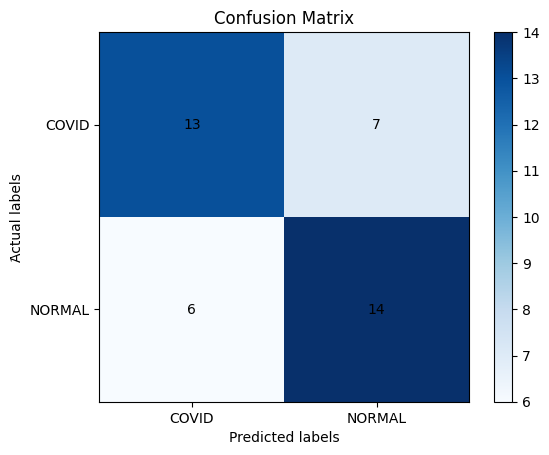

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Extract true labels from the test data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

# Flatten the predictions for calculating metrics
binary_predictions = binary_predictions.flatten()
true_labels = true_labels.flatten()

# Calculate metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['COVID', 'NORMAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted labels')
plt.ylabel('َActual labels')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.show()

**Extra part:**

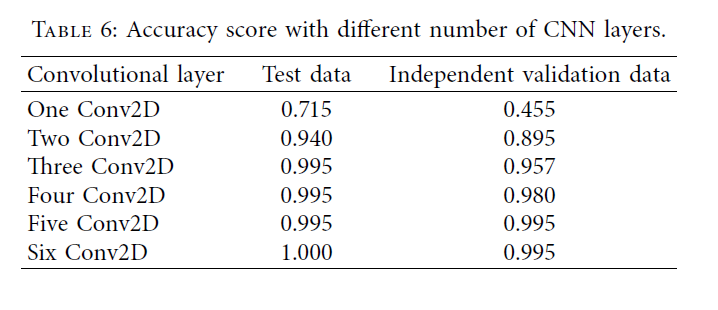

**One Conv2D** :

In [97]:
# Create a dictionary to store the results
results = {'Convolutional Layers': [], 'Test Accuracy': [], 'Validation Accuracy': []}

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# model with one CONV2D:
model_one_conv2d = Sequential()

# Convolutional Layers
# First layer
model_one_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_one_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_one_conv2d.add(BatchNormalization())
model_one_conv2d.add(Dropout(0.2))

# Flatten Layer
model_one_conv2d.add(Flatten())

# Fully Connected Layers
model_one_conv2d.add(Dense(512, activation='relu'))
model_one_conv2d.add(BatchNormalization())

model_one_conv2d.add(Dense(256, activation='relu'))
model_one_conv2d.add(BatchNormalization())

# Output Layer
model_one_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_one_conv2d
model_one_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_one_conv2d summary
model_one_conv2d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_48 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 350464)            0         
                                                                 
 dense_18 (Dense)            (None, 512)              

Epoch 1/50
24/24 [==============================] - 19s 469ms/step - loss: 0.3820 - accuracy: 0.8554 - val_loss: 11.1659 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 14s 446ms/step - loss: 0.1771 - accuracy: 0.9419 - val_loss: 4.3245 - val_accuracy: 0.4757
Epoch 3/50
24/24 [==============================] - 14s 364ms/step - loss: 0.1248 - accuracy: 0.9514 - val_loss: 2.9606 - val_accuracy: 0.4973
Epoch 4/50
24/24 [==============================] - 14s 441ms/step - loss: 0.1290 - accuracy: 0.9500 - val_loss: 3.8500 - val_accuracy: 0.4919
Epoch 5/50
24/24 [==============================] - 14s 443ms/step - loss: 0.0907 - accuracy: 0.9676 - val_loss: 5.8804 - val_accuracy: 0.4811
Epoch 6/50
24/24 [==============================] - 14s 385ms/step - loss: 0.0981 - accuracy: 0.9730 - val_loss: 2.1152 - val_accuracy: 0.5189
Epoch 7/50
24/24 [==============================] - 14s 458ms/step - loss: 0.0726 - accuracy: 0.9703 - val_loss: 1.4068 - val_accuracy: 0.600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


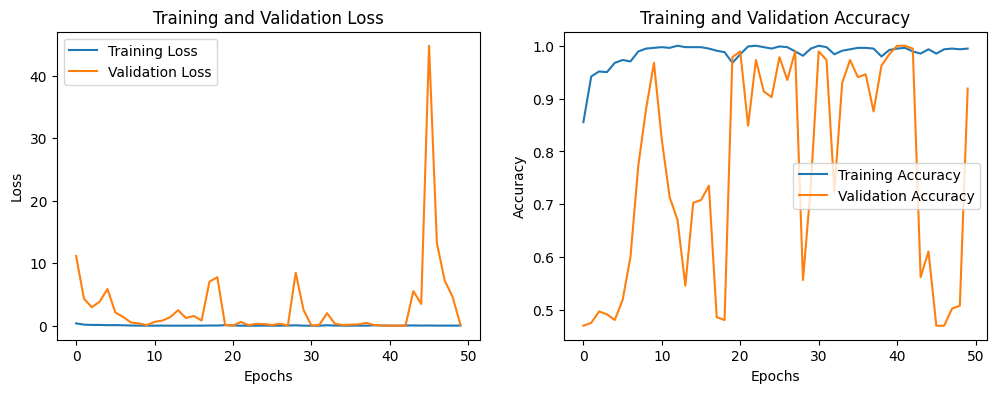

In [99]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_one_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_one_conv2d.save("./models/model_one_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [100]:
# Evaluate on test and validation data
test_accuracy_one_CONV2D = model_one_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_one_CONV2D = model_one_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_one_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_one_CONV2D}\n")

6/6 [==============================] - 3s 15ms/step - loss: 0.1742 - accuracy: 0.9189
Evaluate on test and validation data:

test accuracy: 0.8999999761581421

validation accuracy: 0.9189189076423645



In [101]:
# Store the results
results['Convolutional Layers'].append("One CONV2D")
results['Test Accuracy'].append(test_accuracy_one_CONV2D)
results['Validation Accuracy'].append(val_accuracy_one_CONV2D)
results

{'Convolutional Layers': ['One CONV2D'],
 'Test Accuracy': [0.8999999761581421],
 'Validation Accuracy': [0.9189189076423645]}

**Two Conv2D**

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_two_conv2d = Sequential()

# Convolutional Layers
# First layer
model_two_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_two_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_two_conv2d.add(BatchNormalization())
model_two_conv2d.add(Dropout(0.2))

# Second layer:
model_two_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_two_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_two_conv2d.add(BatchNormalization())
model_two_conv2d.add(Dropout(0.2))

# Flatten Layer
model_two_conv2d.add(Flatten())

# Fully Connected Layers
model_two_conv2d.add(Dense(512, activation='relu'))
model_two_conv2d.add(BatchNormalization())

model_two_conv2d.add(Dense(256, activation='relu'))
model_two_conv2d.add(BatchNormalization())

# Output Layer
model_two_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_two_conv2d
model_two_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_two_conv2d summary
model_two_conv2d.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_51 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_37 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 37, 37, 64)       

Epoch 1/50
24/24 [==============================] - 18s 407ms/step - loss: 0.4250 - accuracy: 0.8622 - val_loss: 36.1649 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 13s 371ms/step - loss: 0.1354 - accuracy: 0.9459 - val_loss: 4.2790 - val_accuracy: 0.5243
Epoch 3/50
24/24 [==============================] - 14s 443ms/step - loss: 0.1118 - accuracy: 0.9595 - val_loss: 1.0809 - val_accuracy: 0.6108
Epoch 4/50
24/24 [==============================] - 13s 383ms/step - loss: 0.0807 - accuracy: 0.9770 - val_loss: 3.4529 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 14s 426ms/step - loss: 0.0928 - accuracy: 0.9635 - val_loss: 2.9389 - val_accuracy: 0.4757
Epoch 6/50
24/24 [==============================] - 14s 425ms/step - loss: 0.0471 - accuracy: 0.9878 - val_loss: 4.3419 - val_accuracy: 0.4703
Epoch 7/50
24/24 [==============================] - 13s 368ms/step - loss: 0.0524 - accuracy: 0.9824 - val_loss: 2.6690 - val_accuracy: 0.518

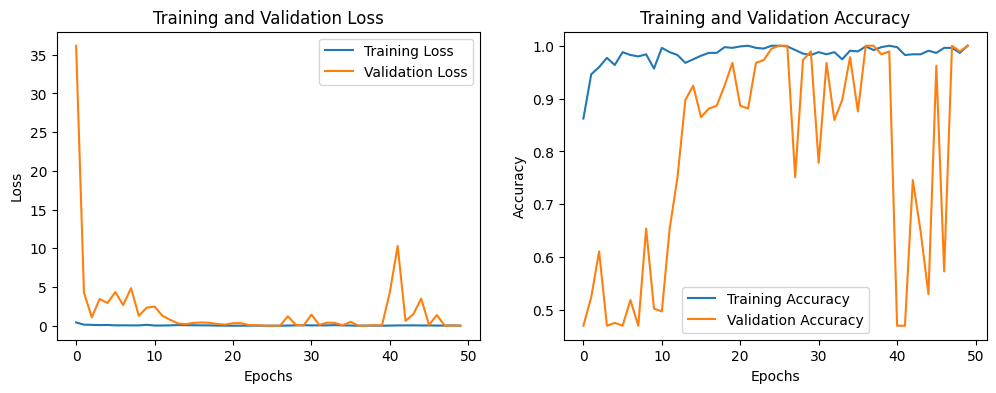

In [103]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_two_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_two_conv2d.save("./models/model_two_conv2d.h5")


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [104]:
# Evaluate on test and validation data
test_accuracy_two_CONV2D = model_two_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_two_CONV2D = model_two_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_two_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_two_CONV2D}\n")

results['Convolutional Layers'].append("Two CONV2D")
results['Test Accuracy'].append(test_accuracy_two_CONV2D)
results['Validation Accuracy'].append(val_accuracy_two_CONV2D)
results

6/6 [==============================] - 2s 14ms/step - loss: 0.0013 - accuracy: 1.0000
Evaluate on test and validation data:

test accuracy: 1.0

validation accuracy: 1.0



{'Convolutional Layers': ['One CONV2D', 'Two CONV2D'],
 'Test Accuracy': [0.8999999761581421, 1.0],
 'Validation Accuracy': [0.9189189076423645, 1.0]}

**Three CONV2D**

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_three_conv2d = Sequential()

# Convolutional Layers
# First layer
model_three_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Second layer:
model_three_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Third layer:
model_three_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Flatten Layer
model_three_conv2d.add(Flatten())

# Fully Connected Layers
model_three_conv2d.add(Dense(512, activation='relu'))
model_three_conv2d.add(BatchNormalization())

model_three_conv2d.add(Dense(256, activation='relu'))
model_three_conv2d.add(BatchNormalization())

# Output Layer
model_three_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_three_conv2d
model_three_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_three_conv2d summary
model_three_conv2d.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_55 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 37, 37, 64)       

Epoch 1/50
24/24 [==============================] - 17s 317ms/step - loss: 0.3688 - accuracy: 0.8568 - val_loss: 66.6066 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 14s 448ms/step - loss: 0.1019 - accuracy: 0.9662 - val_loss: 9.4131 - val_accuracy: 0.4703
Epoch 3/50
24/24 [==============================] - 13s 366ms/step - loss: 0.0562 - accuracy: 0.9797 - val_loss: 3.7404 - val_accuracy: 0.4703
Epoch 4/50
24/24 [==============================] - 14s 437ms/step - loss: 0.0344 - accuracy: 0.9851 - val_loss: 27.1915 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 13s 380ms/step - loss: 0.0842 - accuracy: 0.9676 - val_loss: 9.8673 - val_accuracy: 0.4757
Epoch 6/50
24/24 [==============================] - 14s 448ms/step - loss: 0.0789 - accuracy: 0.9716 - val_loss: 3.0335 - val_accuracy: 0.5351
Epoch 7/50
24/24 [==============================] - 15s 480ms/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 2.0597 - val_accuracy: 0.65

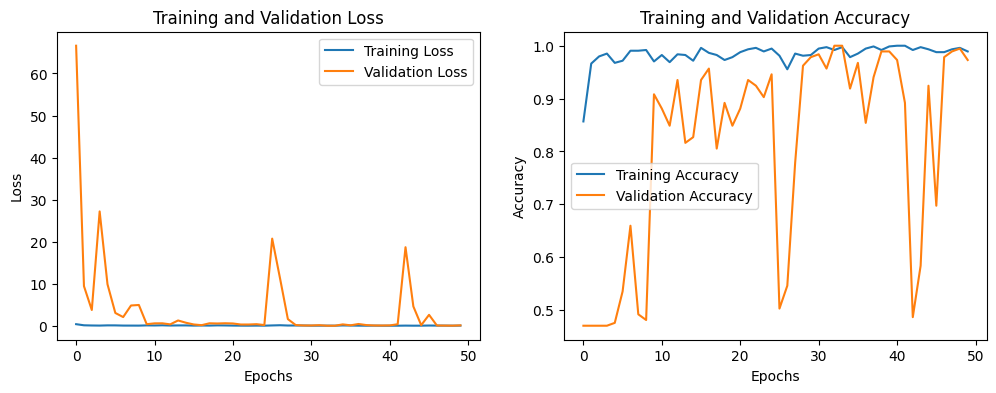

In [106]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_three_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_three_conv2d.save("./models/model_three_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [107]:
# Evaluate on test and validation data
test_accuracy_three_CONV2D = model_three_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_three_CONV2D = model_three_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_three_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_three_CONV2D}\n")

results['Convolutional Layers'].append("Three CONV2D")
results['Test Accuracy'].append(test_accuracy_three_CONV2D)
results['Validation Accuracy'].append(val_accuracy_three_CONV2D)
results

6/6 [==============================] - 2s 15ms/step - loss: 0.0855 - accuracy: 0.9730
Evaluate on test and validation data:

test accuracy: 0.949999988079071

validation accuracy: 0.9729729890823364



{'Convolutional Layers': ['One CONV2D', 'Two CONV2D', 'Three CONV2D'],
 'Test Accuracy': [0.8999999761581421, 1.0, 0.949999988079071],
 'Validation Accuracy': [0.9189189076423645, 1.0, 0.9729729890823364]}

**Four CONV2D**

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_four_conv2d = Sequential()

# Convolutional Layers
# First layer
model_four_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Second layer:
model_four_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Third layer:
model_four_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Forth layer:
model_four_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Flatten Layer
model_four_conv2d.add(Flatten())

# Fully Connected Layers
model_four_conv2d.add(Dense(512, activation='relu'))
model_four_conv2d.add(BatchNormalization())

model_four_conv2d.add(Dense(256, activation='relu'))
model_four_conv2d.add(BatchNormalization())

# Output Layer
model_four_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_four_conv2d
model_four_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_four_conv2d summary
model_four_conv2d.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_60 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_42 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 37, 37, 64)       

Epoch 1/50
24/24 [==============================] - 17s 300ms/step - loss: 0.4440 - accuracy: 0.8662 - val_loss: 55.4504 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 14s 433ms/step - loss: 0.1375 - accuracy: 0.9581 - val_loss: 21.7578 - val_accuracy: 0.4757
Epoch 3/50
24/24 [==============================] - 14s 370ms/step - loss: 0.1142 - accuracy: 0.9595 - val_loss: 1.4327 - val_accuracy: 0.7189
Epoch 4/50
24/24 [==============================] - 14s 349ms/step - loss: 0.0681 - accuracy: 0.9757 - val_loss: 8.7775 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 14s 456ms/step - loss: 0.1105 - accuracy: 0.9676 - val_loss: 9.1393 - val_accuracy: 0.4703
Epoch 6/50
24/24 [==============================] - 14s 372ms/step - loss: 0.0382 - accuracy: 0.9838 - val_loss: 6.7713 - val_accuracy: 0.4703
Epoch 7/50
24/24 [==============================] - 14s 447ms/step - loss: 0.0602 - accuracy: 0.9757 - val_loss: 3.8941 - val_accuracy: 0.47

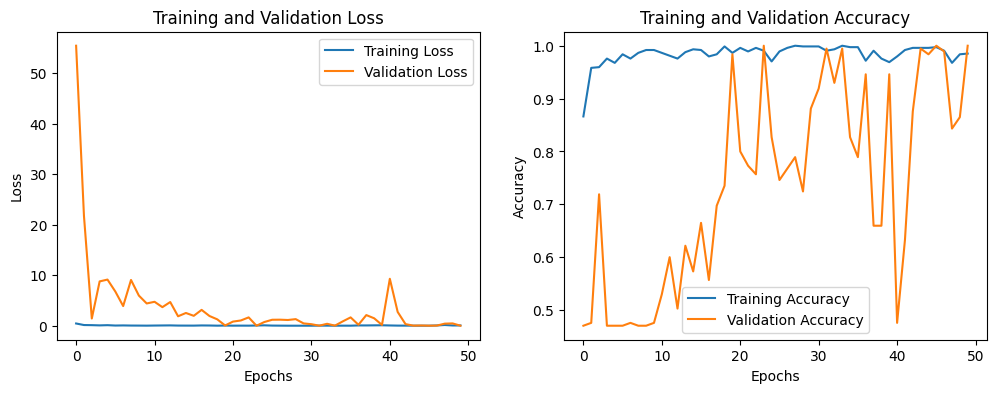

In [109]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_four_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_four_conv2d.save("./models/model_four_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [110]:
# Evaluate on test and validation data
test_accuracy_four_CONV2D = model_four_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_four_CONV2D = model_four_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_four_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_four_CONV2D}\n")

results['Convolutional Layers'].append("Four CONV2D")
results['Test Accuracy'].append(test_accuracy_four_CONV2D)
results['Validation Accuracy'].append(val_accuracy_four_CONV2D)
results

6/6 [==============================] - 3s 16ms/step - loss: 0.0097 - accuracy: 1.0000
Evaluate on test and validation data:

test accuracy: 0.9750000238418579

validation accuracy: 1.0



{'Convolutional Layers': ['One CONV2D',
  'Two CONV2D',
  'Three CONV2D',
  'Four CONV2D'],
 'Test Accuracy': [0.8999999761581421,
  1.0,
  0.949999988079071,
  0.9750000238418579],
 'Validation Accuracy': [0.9189189076423645, 1.0, 0.9729729890823364, 1.0]}

**Five CONV2D**

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_five_conv2d = Sequential()

# Convolutional Layers
# First layer
model_five_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Second layer:
model_five_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Third layer:
model_five_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Forth layer:
model_five_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Fifth layer:
model_five_conv2d.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Flatten Layer
model_five_conv2d.add(Flatten())

# Fully Connected Layers
model_five_conv2d.add(Dense(512, activation='relu'))
model_five_conv2d.add(BatchNormalization())

model_five_conv2d.add(Dense(256, activation='relu'))
model_five_conv2d.add(BatchNormalization())

# Output Layer
model_five_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_five_conv2d
model_five_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_five_conv2d summary
model_five_conv2d.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_66 (Ba  (None, 74, 74, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_46 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 37, 37, 64)      

Epoch 1/50
24/24 [==============================] - 18s 301ms/step - loss: 0.5756 - accuracy: 0.8554 - val_loss: 485.2414 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 15s 487ms/step - loss: 0.1215 - accuracy: 0.9595 - val_loss: 51.5003 - val_accuracy: 0.4703
Epoch 3/50
24/24 [==============================] - 14s 411ms/step - loss: 0.1175 - accuracy: 0.9527 - val_loss: 15.5616 - val_accuracy: 0.4703
Epoch 4/50
24/24 [==============================] - 14s 423ms/step - loss: 0.0733 - accuracy: 0.9676 - val_loss: 5.3997 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 14s 419ms/step - loss: 0.1218 - accuracy: 0.9568 - val_loss: 11.9446 - val_accuracy: 0.4703
Epoch 6/50
24/24 [==============================] - 14s 411ms/step - loss: 0.1545 - accuracy: 0.9405 - val_loss: 1.3864 - val_accuracy: 0.6378
Epoch 7/50
24/24 [==============================] - 15s 493ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 2.4936 - val_accuracy: 0

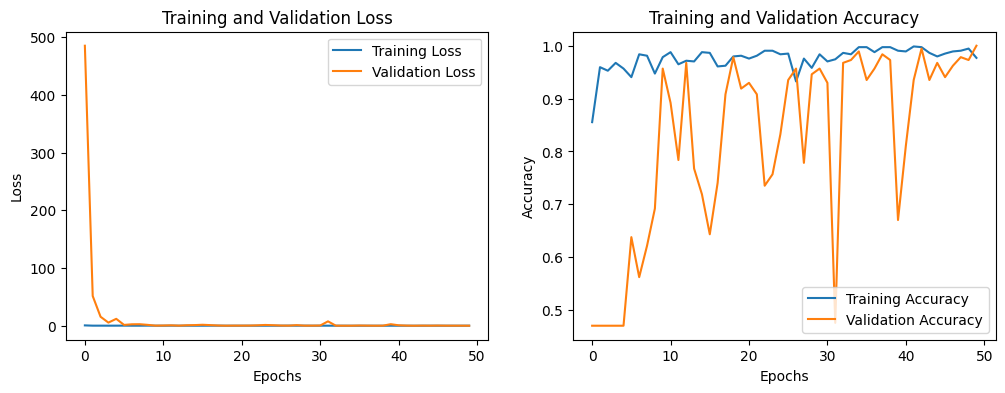

In [112]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_five_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_five_conv2d.save("./models/model_five_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [113]:
# Evaluate on test and validation data
test_accuracy_five_CONV2D = model_five_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_five_CONV2D = model_five_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_five_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_five_CONV2D}\n")

results['Convolutional Layers'].append("Five CONV2D")
results['Test Accuracy'].append(test_accuracy_five_CONV2D)
results['Validation Accuracy'].append(val_accuracy_five_CONV2D)
results

6/6 [==============================] - 2s 16ms/step - loss: 0.0064 - accuracy: 1.0000
Evaluate on test and validation data:

test accuracy: 0.949999988079071

validation accuracy: 1.0



{'Convolutional Layers': ['One CONV2D',
  'Two CONV2D',
  'Three CONV2D',
  'Four CONV2D',
  'Five CONV2D'],
 'Test Accuracy': [0.8999999761581421,
  1.0,
  0.949999988079071,
  0.9750000238418579,
  0.949999988079071],
 'Validation Accuracy': [0.9189189076423645,
  1.0,
  0.9729729890823364,
  1.0,
  1.0]}

**Six CONV2D**

In [114]:
# Evaluate on test and validation data
test_accuracy_six_CONV2D = model.evaluate(test_data, verbose=1)[1]
val_accuracy_six_CONV2D = model.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_six_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_six_CONV2D}\n")

results['Convolutional Layers'].append("Six CONV2D")
results['Test Accuracy'].append(test_accuracy_six_CONV2D)
results['Validation Accuracy'].append(val_accuracy_six_CONV2D)
results

6/6 [==============================] - 3s 18ms/step - loss: 0.5941 - accuracy: 0.9081
Evaluate on test and validation data:

test accuracy: 0.9750000238418579

validation accuracy: 0.908108115196228



{'Convolutional Layers': ['One CONV2D',
  'Two CONV2D',
  'Three CONV2D',
  'Four CONV2D',
  'Five CONV2D',
  'Six CONV2D'],
 'Test Accuracy': [0.8999999761581421,
  1.0,
  0.949999988079071,
  0.9750000238418579,
  0.949999988079071,
  0.9750000238418579],
 'Validation Accuracy': [0.9189189076423645,
  1.0,
  0.9729729890823364,
  1.0,
  1.0,
  0.908108115196228]}

Table 6: Accuracy score with different numbers of CNN layers
Convolutional Layers Test Accuracy        Validation Accuracy 
One CONV2D           0.900                0.919               
Two CONV2D           1.000                1.000               
Three CONV2D         0.950                0.973               
Four CONV2D          0.975                1.000               
Five CONV2D          0.950                1.000               
Six CONV2D           0.975                0.908               


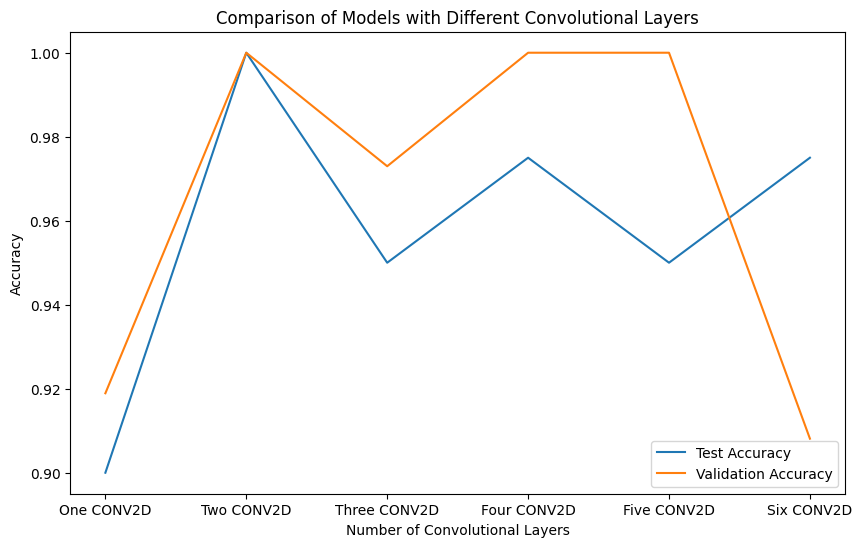

In [115]:


# Display the results
print("Table 6: Accuracy score with different numbers of CNN layers")
print("{:<20} {:<20} {:<20}".format('Convolutional Layers', 'Test Accuracy', 'Validation Accuracy'))
for i in range(6):
    print("{:<20} {:<20.3f} {:<20.3f}".format(results['Convolutional Layers'][i], results['Test Accuracy'][i], results['Validation Accuracy'][i]))

# Plot comparison of models
plt.figure(figsize=(10, 6))
plt.plot(results['Convolutional Layers'], results['Test Accuracy'], label='Test Accuracy')
plt.plot(results['Convolutional Layers'], results['Validation Accuracy'], label='Validation Accuracy')
plt.title('Comparison of Models with Different Convolutional Layers')
plt.xlabel('Number of Convolutional Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!zip -r ./folders.zip ./dataset/

  adding: dataset/ (stored 0%)
  adding: dataset/xray_dataset_covid19/ (stored 0%)
  adding: dataset/xray_dataset_covid19/test/ (stored 0%)
  adding: dataset/xray_dataset_covid19/test/COVID/ (stored 0%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg (deflated 1%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg (deflated 0%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg (deflated 1%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg (deflated 1%)
  adding: dataset/xray_dataset_covid19/test/COVID/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg (deflated 1%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg (deflated 0%)
  adding: dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34

In [ ]:
from google.colab import files
files.download("./folders.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>